In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from utils import get_config_params, get_data, standarize_data
from oja import OjaNetwork

## Biplot para las componentes principales 1 y 2

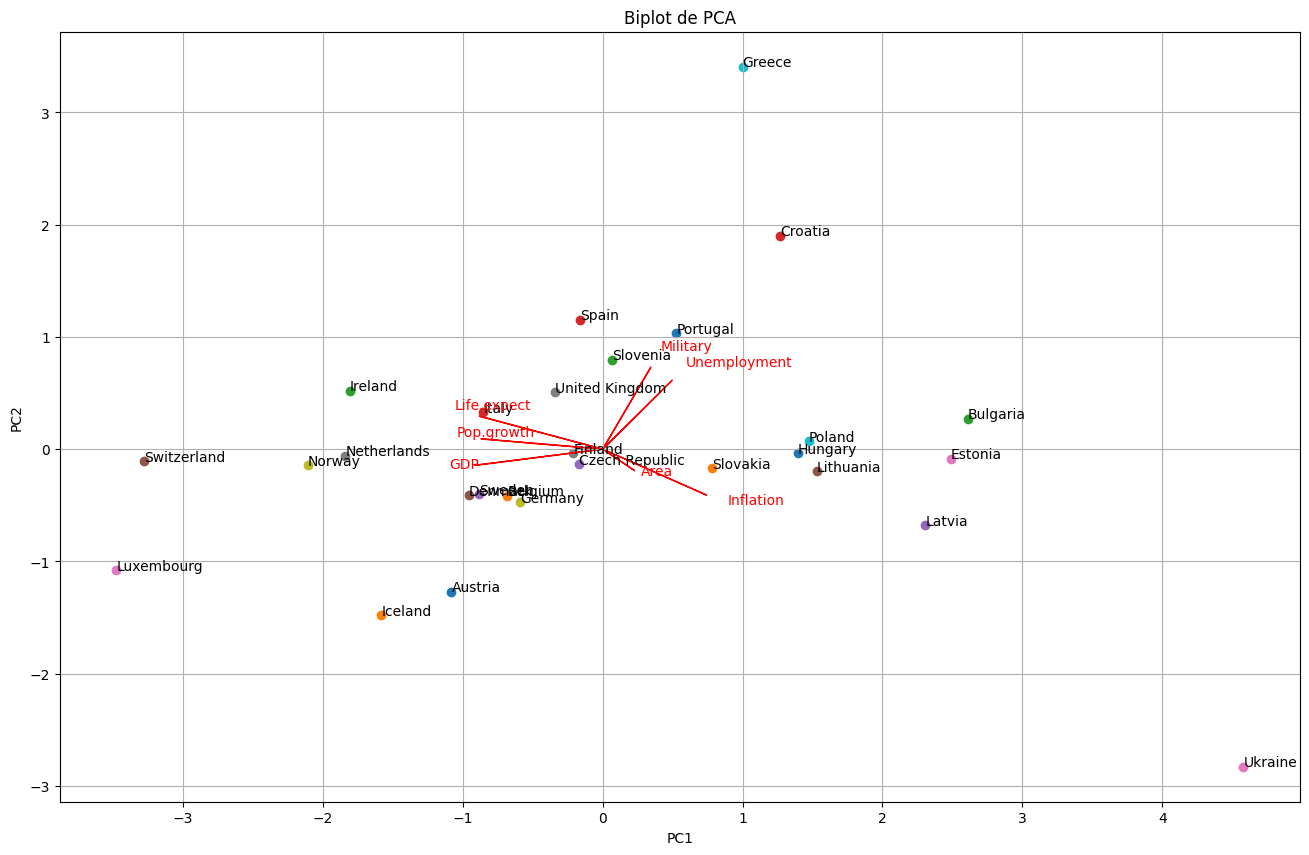

In [8]:
# Leemos los datos
data = pd.read_csv("data/europe.csv")
components = list(data.columns)[1:]

# Extraer los nombres de los países y almacenarlos en una variable
countries = data["Country"]
data = data.drop(columns=["Country"])  # Eliminar la columna de nombres de los países

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ajustar un modelo de PCA con dos componentes principales
pca = PCA() # n_components=2
principal_components = pca.fit_transform(data_scaled)

# Obtenemos las cargas de las componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los resultados del PCA
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])

# Crear el gráfico de biplot con los nombres de los países
fig, ax = plt.subplots(figsize=(16, 10))  # Aumentar el tamaño del gráfico

for i, country in enumerate(countries):
    x = principal_df.loc[i, "PC1"]
    y = principal_df.loc[i, "PC2"]
    ax.scatter(x, y)
    ax.annotate(country, (x, y))

# Graficar los vectores de las componentes
for i in range(len(principal_components[0])):
        ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0, head_length=0, fc='red', ec='red')
        ax.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, f'{components[i]}', color='red')


# Configurar el gráfico
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Biplot de PCA")

plt.grid()
plt.show()

## Gráfico de barras para la componente principal 1 según el país

Vector de Cargas - PC1
[ Area GDP Inflation Life.expect Military Pop.growth Unemployment ]
[-0.12558938  0.50044306 -0.40722235  0.48302071 -0.18751446  0.47555222
 -0.27130766]


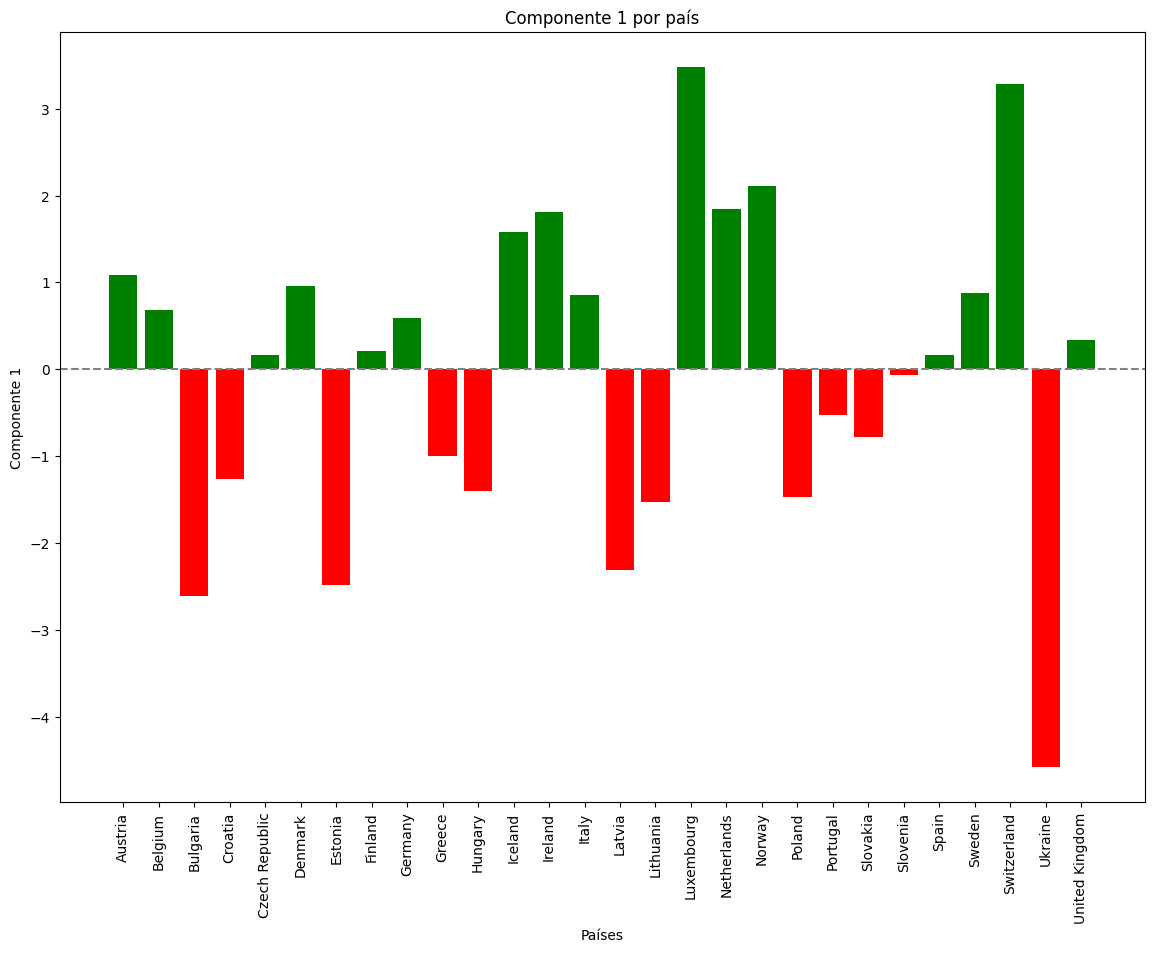

In [21]:
with open('./config.json', 'r') as f:
        config = json.load(f)

learning_rate, max_epochs = get_config_params(config)

countries, labels, data = get_data()

standarized_data = standarize_data(data)

oja = OjaNetwork(learning_rate, len(standarized_data[0]))

weights = oja.train(standarized_data, max_epochs)

print("Vector de Cargas - PC1")
print("[ Area " + "GDP " + "Inflation " + "Life.expect " + "Military " + "Pop.growth " + "Unemployment ]")
print(weights)

pca = np.matmul(standarized_data, weights)

principal_df = pd.DataFrame(data=pca, columns=["Componente 1"])

fig, ax = plt.subplots(figsize=(14, 10))

# Define a function to map values to colors
def color_mapping(value):
    if value > 0:
        return 'green'
    else:
        return 'red'

# Map values to colors using the color mapping function
colors = [color_mapping(value) for value in pca]

ax.bar(countries, principal_df["Componente 1"], color=colors)

ax.axhline(y=0, color='gray', linestyle='--')
ax.set_ylabel("Componente 1")
ax.set_xlabel("Países")
ax.set_title("Componente 1 por país")

plt.xticks(rotation='vertical')
plt.show()